In [1]:
#Import the libraries we need
import pandas as pd
import numpy  as np 
import seaborn as sns
import MetaTrader5 as mt5
from sklearn.model_selection import cross_val_score,train_test_split,TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Initialize the terminal
mt5.initialize()

True

In [12]:
#Declare the time-frames we are interested in
time_frames = [mt5.TIMEFRAME_MN1,
               mt5.TIMEFRAME_W1,
               mt5.TIMEFRAME_D1,
               mt5.TIMEFRAME_H12,
               mt5.TIMEFRAME_H8,
               mt5.TIMEFRAME_H4,
               mt5.TIMEFRAME_H1,
               mt5.TIMEFRAME_M30,
               mt5.TIMEFRAME_M15,
               mt5.TIMEFRAME_M5,
               mt5.TIMEFRAME_M1
              ]

In [13]:
#How many bars should we fetch 
fetch = 400

In [14]:
#How far into the future should we forecast?
look_ahead = 20

In [9]:
#Create our dataframe
inputs = ["MN","W","D","H12","H8","H4","H1","M30","M15","M5","M1"]

target = []

for i in np.arange(0,len(inputs)):
    target.append(inputs[i] + " Target")

In [7]:
columns = inputs + target

prices = pd.DataFrame(columns=columns,index=np.arange(0,fetch))

In [8]:
prices

,MN,W,D,H12,H8,H4,H1,M30,M15,M5,...,W Target,D Target,H12 Target,H8 Target,H4 Target,H1 Target,M30 Target,M15 Target,M5 Target,M1 Target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#The columns for our data frame
error_columns = []


for i in np.arange(0,len(inputs)):
    error_columns.append(inputs[i])

#Create a dataframe to store our error levels
error_levels = pd.DataFrame(columns=error_columns,index=[0])
test_error_levels = pd.DataFrame(columns=error_columns,index=[0])

In [10]:
error_levels

,MN,W,D,H12,H8,H4,H1,M30,M15,M5,M1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for i in np.arange(0,len(time_frames)):
    print(i)
    prices.iloc[:,i]   = pd.DataFrame(mt5.copy_rates_from_pos("EURUSD",time_frames[i],look_ahead,fetch)).loc[:,"close"]
    prices.iloc[:,i+10] = pd.DataFrame(mt5.copy_rates_from_pos("EURUSD",time_frames[i],0,fetch)).loc[:,"close"]

0
1
2
3
4
5
6
7
8
9
10


<Axes: >

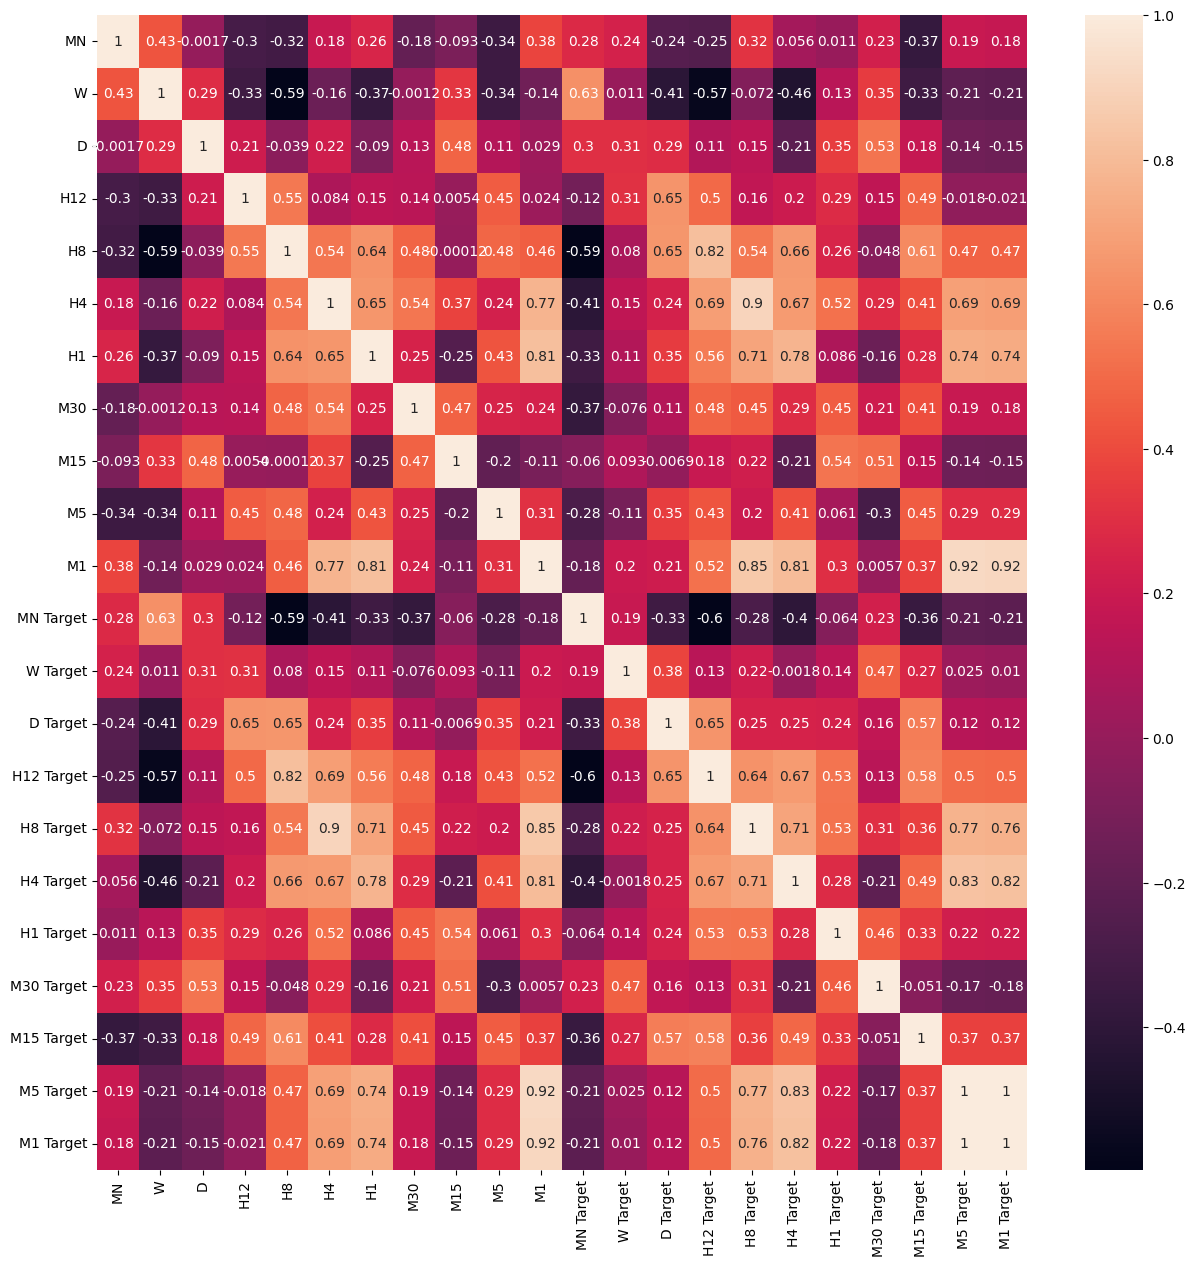

In [22]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(prices.corr(),annot=True,ax=ax)

<Axes: xlabel='MN Close', ylabel='W Close'>

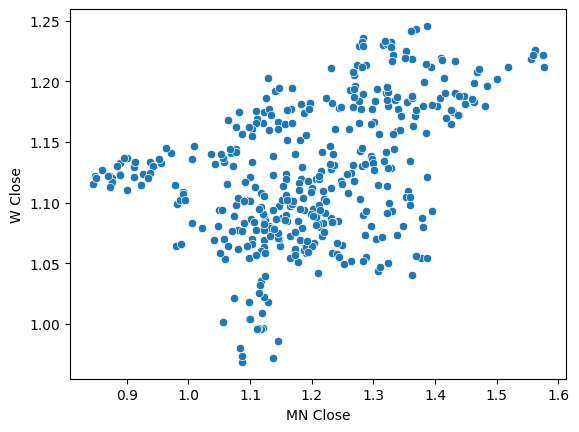

In [42]:
sns.scatterplot(data=prices,x="MN Close",y="W Close")

<Axes: xlabel='MN Close', ylabel='W Close'>

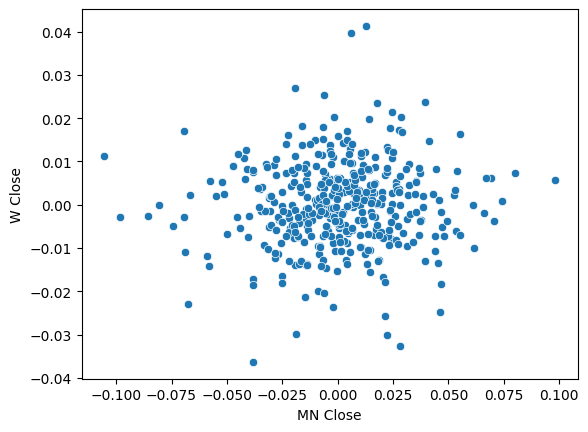

In [45]:
sns.scatterplot(data=prices.pct_change(),x="MN Close",y="W Close")

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


<Axes: xlabel='MN Close', ylabel='W Close'>

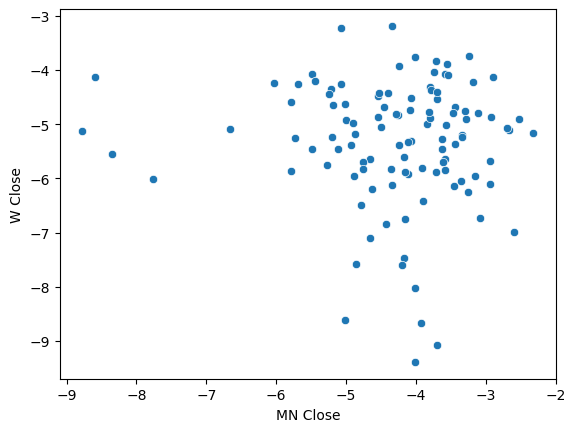

In [40]:
sns.scatterplot(data=np.log(prices.pct_change().dropna()),x="MN Close",y="W Close")

<Axes: xlabel='H4 Close', ylabel='D Close'>

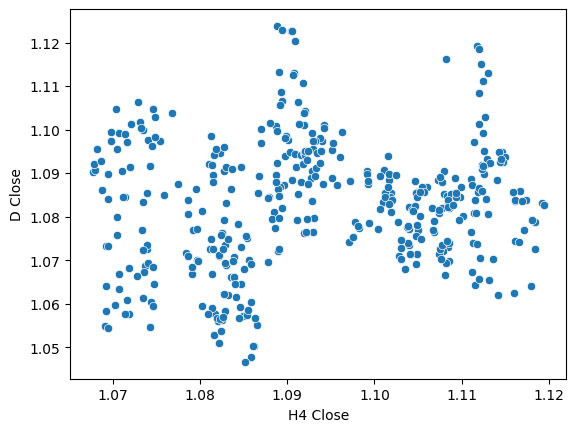

In [27]:
sns.scatterplot(data=prices,x="H4 Close",y="D Close")

<Axes: >

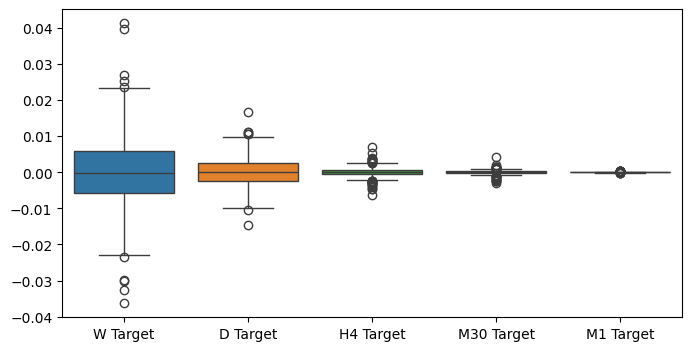

In [65]:
fig , ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=prices.iloc[:,-5:].pct_change())

<Axes: xlabel='M30 Close', ylabel='M1 Close'>

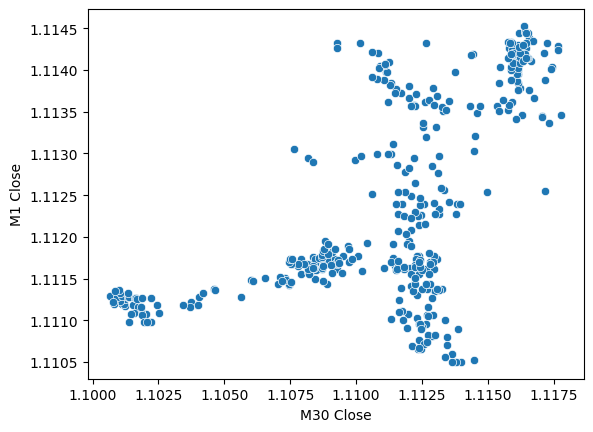

In [26]:
sns.scatterplot(data=prices,x="M30 Close",y="M1 Close")

In [23]:
#Create train test splits
X_train_mn,X_test_mn,y_train_mn,y_test_mn      = train_test_split(prices.loc[:,["MN"]],prices.loc[:,"MN Target"],test_size=0.5,shuffle=False)
X_train_w,X_test_w,y_train_w,y_test_w          = train_test_split(prices.loc[:,["W"]],prices.loc[:,"W Target"],test_size=0.5,shuffle=False)
X_train_d,X_test_d,y_train_d,y_test_d          = train_test_split(prices.loc[:,["D"]],prices.loc[:,"D Target"],test_size=0.5,shuffle=False)
X_train_h12,X_test_h12,y_train_h12,y_test_h12  = train_test_split(prices.loc[:,["H12"]],prices.loc[:,"H12 Target"],test_size=0.5,shuffle=False)
X_train_h8,X_test_h8,y_train_h8,y_test_h8      = train_test_split(prices.loc[:,["H8"]],prices.loc[:,"H8 Target"],test_size=0.5,shuffle=False)
X_train_h4,X_test_h4,y_train_h4,y_test_h4      = train_test_split(prices.loc[:,["H4"]],prices.loc[:,"H4 Target"],test_size=0.5,shuffle=False)
X_train_h1,X_test_h1,y_train_h1,y_test_h1      = train_test_split(prices.loc[:,["H1"]],prices.loc[:,"H1 Target"],test_size=0.5,shuffle=False)
X_train_m30,X_test_m30,y_train_m30,y_test_m30  = train_test_split(prices.loc[:,["M30"]],prices.loc[:,"M30 Target"],test_size=0.5,shuffle=False)
X_train_m15,X_test_m15,y_train_m15,y_test_m15  = train_test_split(prices.loc[:,["M15"]],prices.loc[:,"M15 Target"],test_size=0.5,shuffle=False)
X_train_m5,X_test_m5,y_train_m5,y_test_m5      = train_test_split(prices.loc[:,["M5"]],prices.loc[:,"M5 Target"],test_size=0.5,shuffle=False)
X_train_m1,X_test_m1,y_train_m1,y_test_m1      = train_test_split(prices.loc[:,["M1"]],prices.loc[:,"M1 Target"],test_size=0.5,shuffle=False)

In [26]:
train_X = [
X_train_mn,
X_train_w,
X_train_d,
X_train_h12,
X_train_h8,
X_train_h4,
X_train_h1,
X_train_m30,
X_train_m15,
X_train_m5,
X_train_m1
]

test_X = [
X_test_mn,
X_test_w,
X_test_d,
X_test_h12,
X_test_h8,
X_test_h4,
X_test_h1,
X_test_m30,
X_test_m15,
X_test_m5,
X_test_m1
]

In [27]:
train_y = [
y_train_mn,
y_train_w,
y_train_d,
y_train_h12,
y_train_h8,
y_train_h4,
y_train_h1,
y_train_m30,
y_train_m15,
y_train_m5,
y_train_m1,
]

test_y = [
y_test_mn,
y_test_w,
y_test_d,
y_test_h12,
y_test_h8,
y_test_h4,
y_test_h1,
y_test_m30,
y_test_m15,
y_test_m5,
y_test_m1,
]

In [33]:
#Record our error 
for i in np.arange(0,len(train_X)):
    #Fit the model
    model = LinearRegression()
    cv_score = cross_val_score(model,train_X[i],train_y[i],cv=5)
    error_levels.iloc[0,i] = np.mean(cv_score * -1)
    #Record validation error
    model.fit(train_X[i],train_y[i])
    test_error_levels.iloc[0,i] = mean_squared_error(test_y[i],model.predict(test_X[i]))
    

In [51]:
error_levels

,MN,W,D,H12,H8,H4,H1,M30,M15,M5,M1
0,0.719131,3.979435,3.897228,5.023601,5.218168,40.406227,0.196244,18.264356,3.680168,20.331821,3.540946


<Axes: >

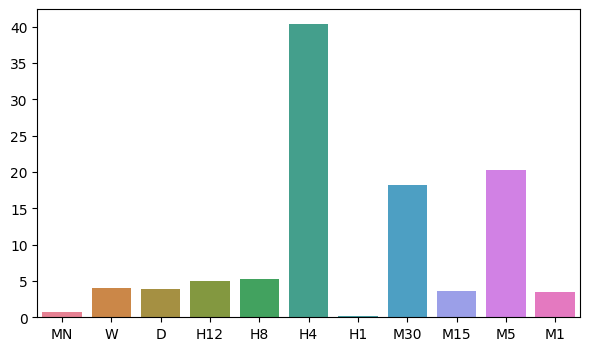

In [50]:
fig, ax = plt.subplots(figsize=(7,4)) 
sns.barplot(error_levels,ax=ax)

In [110]:
from statsmodels.tsa.stattools import grangercausalitytests

result = grangercausalitytests(prices[['H1 Close','MN Close']].pct_change().dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4913  , p=0.0347  , df_denom=395, df_num=1
ssr based chi2 test:   chi2=4.5254  , p=0.0334  , df=1
likelihood ratio test: chi2=4.4999  , p=0.0339  , df=1
parameter F test:         F=4.4913  , p=0.0347  , df_denom=395, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2706  , p=0.1046  , df_denom=392, df_num=2
ssr based chi2 test:   chi2=4.5991  , p=0.1003  , df=2
likelihood ratio test: chi2=4.5727  , p=0.1016  , df=2
parameter F test:         F=2.2706  , p=0.1046  , df_denom=392, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7603  , p=0.1542  , df_denom=389, df_num=3
ssr based chi2 test:   chi2=5.3758  , p=0.1463  , df=3
likelihood ratio test: chi2=5.3397  , p=0.1485  , df=3
parameter F test:         F=1.7603  , p=0.1542  , df_denom=389, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0286  , p=0.0897  

C:\users\volatily\Temp\ipykernel_212\2351387838.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = grangercausalitytests(prices[['H1 Close','MN Close']].pct_change().dropna(), maxlag=4)


In [111]:
result = grangercausalitytests(prices[['MN Close','H1 Close']].pct_change().dropna(), maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0188  , p=0.8909  , df_denom=395, df_num=1
ssr based chi2 test:   chi2=0.0190  , p=0.8905  , df=1
likelihood ratio test: chi2=0.0190  , p=0.8905  , df=1
parameter F test:         F=0.0188  , p=0.8909  , df_denom=395, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2182  , p=0.1102  , df_denom=392, df_num=2
ssr based chi2 test:   chi2=4.4930  , p=0.1058  , df=2
likelihood ratio test: chi2=4.4678  , p=0.1071  , df=2
parameter F test:         F=2.2182  , p=0.1102  , df_denom=392, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7310  , p=0.1601  , df_denom=389, df_num=3
ssr based chi2 test:   chi2=5.2863  , p=0.1520  , df=3
likelihood ratio test: chi2=5.2513  , p=0.1543  , df=3
parameter F test:         F=1.7310  , p=0.1601  , df_denom=389, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4694  , p=0.2108  

C:\users\volatily\Temp\ipykernel_212\2133825858.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = grangercausalitytests(prices[['MN Close','H1 Close']].pct_change().dropna(), maxlag=4)


In [66]:
#Let's calculate the simillarities between our time series data
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

C:\users\volatily\Temp\ipykernel_640\1274131361.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series_1 = prices["MN"].pct_change(periods=1).dropna().reset_index(drop=True) * 100
C:\users\volatily\Temp\ipykernel_640\1274131361.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series_2 = prices["H1"].pct_change(periods=1).dropna().reset_index(drop=True) * 100


(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

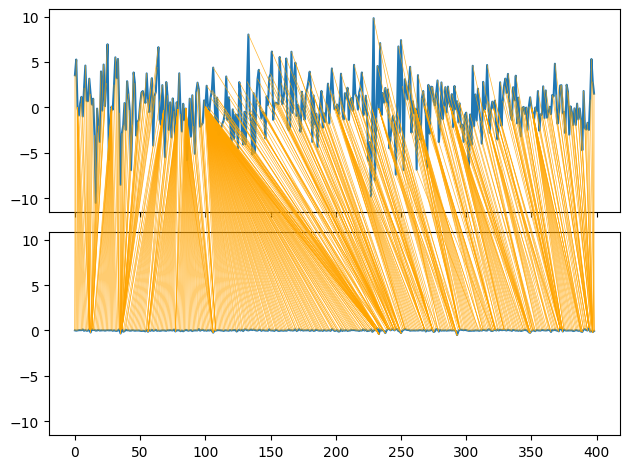

In [56]:
series_1 = prices["MN Close"].pct_change(periods=1).dropna().reset_index(drop=True) * 100
series_2 = prices["H1 Close"].pct_change(periods=1).dropna().reset_index(drop=True) * 100
path = dtw.warping_path(series_1, series_2)
dtwvis.plot_warping(series_1, series_2, path)

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

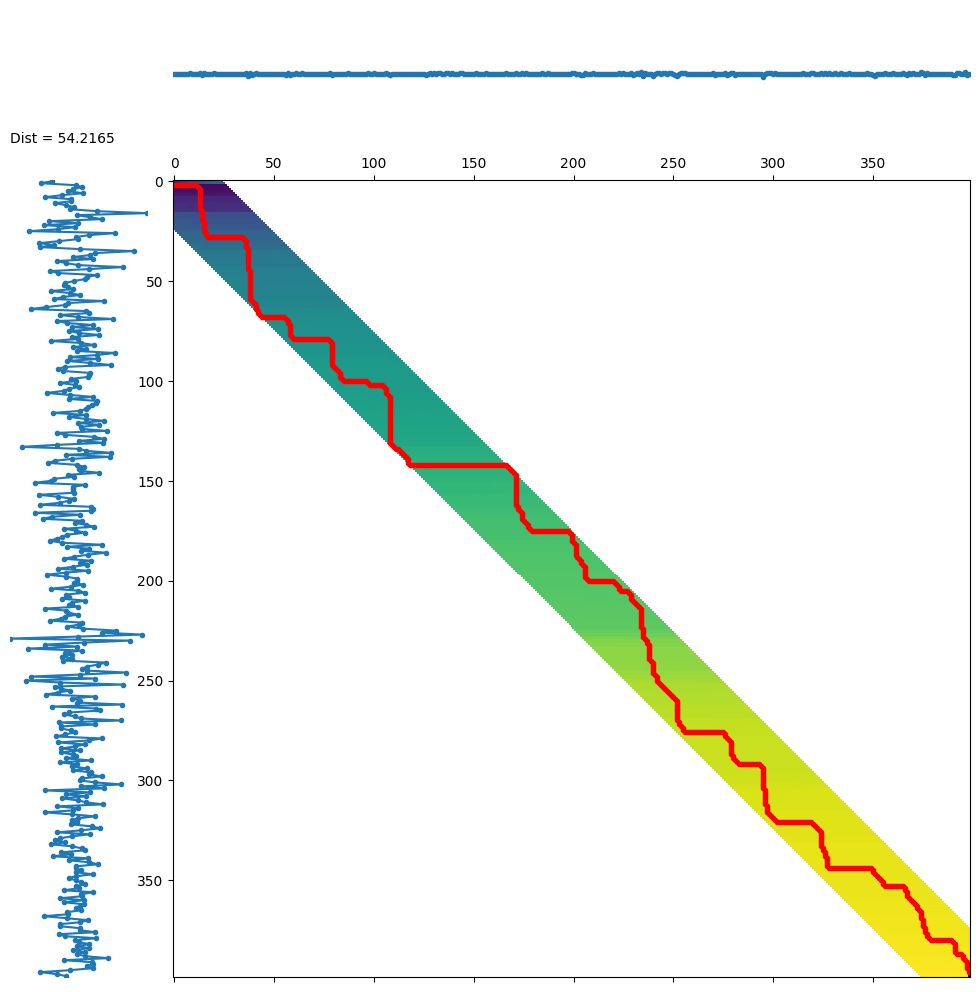

In [107]:
d, paths = dtw.warping_paths(series_1, series_2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(series_1, series_2, paths, best_path)

In [78]:
#Let's try to outperform our linear regression model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

#Let's tune our model
model = MLPRegressor(max_iter=500)

In [79]:
#Tuner 
tuner = RandomizedSearchCV(
    model,
        {
        "activation" : ["relu","logistic","tanh","identity"],
        "solver":["adam","sgd","lbfgs"],
        "alpha":[0.1,0.01,0.001,0.0001,0.00001,0.00001,0.0000001,0.000000001,0.000000000000001],
        "tol":[0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.000000001,0.000000000000001],
        "learning_rate":['constant','adaptive','invscaling'],
        "learning_rate_init":[1,0.1,0.0001,0.000001,100,10000,1000000,1000000000,100,1000],
        "shuffle": [True,False],
        "hidden_layer_sizes":[(1,4),(1,4,5),(1,8,10),(2,5),(8),(10,12),(5,10,4)]
        },
        n_iter=100,
        cv=5,
        n_jobs=-1,
        scoring="neg_mean_squared_error"
)

In [125]:
tuner.fit(X_train_mn,y_train_mn)

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
34 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\neural_network\_multilaye

RandomizedSearchCV(cv=5, estimator=MLPRegressor(max_iter=500), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'activation': ['relu', 'logistic',
                                                       'tanh', 'identity'],
                                        'alpha': [0.1, 0.01, 0.001, 0.0001,
                                                  1e-05, 1e-05, 1e-07, 1e-09,
                                                  1e-15],
                                        'hidden_layer_sizes': [(1, 4),
                                                               (1, 4, 5),
                                                               (1, 8, 10),
                                                               (2, 5), 8,
                                                               (10, 12),
                                                               (5, 10, 4)],
                                        'learning_rate': ['constant',
                                                          'adaptive',
                                                          'invscaling'],
                                        'learning_rate_init': [1, 0.1, 0.0001,
                                                               1e-06, 100,
                                                               10000, 1000000,
                                                               1000000000, 100,
                                                               1000],
                                        'shuffle': [True, False],
                                        'solver': ['adam', 'sgd', 'lbfgs'],
                                        'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05,
                                                1e-06, 1e-07, 1e-09, 1e-15]},
                   scoring='neg_mean_squared_error')

In [127]:
tuner.best_params_

{'tol': 0.001,
 'solver': 'lbfgs',
 'shuffle': True,
 'learning_rate_init': 1,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (2, 5),
 'alpha': 1e-05,
 'activation': 'identity'}

In [128]:
#Deeper optimization
from scipy.optimize import minimize

In [131]:
#Create a dataframe to store our accuracy
current_error_rate = pd.DataFrame(index = np.arange(0,5),columns=["Current Error"])
optimization_progress = []

In [140]:
#Define the objective function
def objective(x):
    #The parameter x represents a new value for our neural network's settings
    #In order to find optimal settings, we will perform 10 fold cross validation using the new setting
    #And return the average RMSE from all 10 tests
    #We will first turn the model's Alpha parameter, which controls the amount of L2 regularization
    model = MLPRegressor(hidden_layer_sizes=tuner.best_params_["hidden_layer_sizes"],
                         activation=tuner.best_params_["activation"],
                         learning_rate=tuner.best_params_["learning_rate"],
                         solver=tuner.best_params_["solver"],
                         shuffle=tuner.best_params_["shuffle"],
                         alpha=x[0],
                         tol=x[1],
                         learning_rate_init=x[2])
    #Now we will cross validate the model
    for i,(train,test) in enumerate(tscv.split(X_train_mn)):
        #Train the model
        model.fit(X_train_mn.loc[train[0]:train[-1],:],y_train_mn.loc[train[0]:train[-1]])
        #Measure the RMSE
        current_error_rate.iloc[i,0] = mean_squared_error(y_train_mn.loc[test[0]:test[-1]],model.predict(X_train_mn.loc[test[0]:test[-1],:]))
    #Record the progress made by the optimizer
    optimization_progress.append(current_error_rate.iloc[:,0].mean())
    #Return the Mean CV RMSE
    return(current_error_rate.iloc[:,0].mean())

In [150]:
#Define the starting point
pt = [tuner.best_params_["alpha"],tuner.best_params_["tol"],tuner.best_params_["learning_rate_init"]]
bnds = ((0.000000001,10000000000),(0.0000000001,10000000000),(0.000000001,10000000000))

In [155]:
#Searchin deeper for parameters
result = minimize(objective,pt,method="TNC",bounds=bnds)

In [156]:
result

 message: Converged (|x_n-x_(n-1)| ~= 0)
 success: True
  status: 2
     fun: 0.04257403904271943
       x: [ 4.864e-05  1.122e-03  9.999e-01]
     nit: 1
     jac: [ 1.298e+04  1.806e+02 -3.371e+03]
    nfev: 92

In [193]:
optima_y = result.fun
optima_x = optimization_progress.index(optima_y)
inputs = np.arange(0,len(optimization_progress))

Text(0.5, 1.0, 'Minimizing Training MSE')

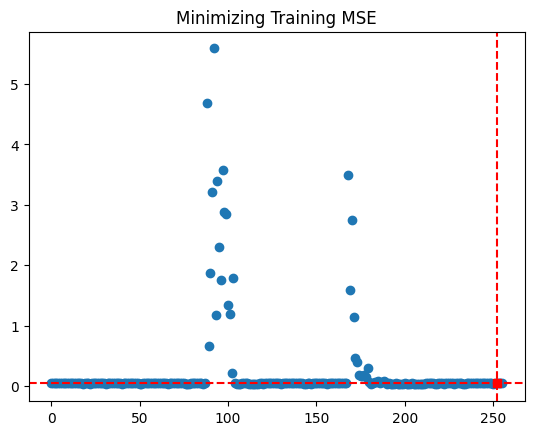

In [196]:
plt.scatter(inputs,optimization_progress)
plt.plot(optima_x,optima_y,'s',color='r')
plt.axvline(x=optima_x,ls='--',color='red')
plt.axhline(y=optima_y,ls='--',color='red')
plt.title("Minimizing Training MSE")

In [160]:
#Test for overfitting
benchmark = LinearRegression()

default_model = MLPRegressor(max_iter=200)

random_search_model = MLPRegressor(hidden_layer_sizes=tuner.best_params_["hidden_layer_sizes"],
                         activation=tuner.best_params_["activation"],
                         learning_rate=tuner.best_params_["learning_rate"],
                         solver=tuner.best_params_["solver"],
                         shuffle=tuner.best_params_["shuffle"],
                         alpha=tuner.best_params_["alpha"],
                         tol=tuner.best_params_["tol"],
                         learning_rate_init=tuner.best_params_["learning_rate_init"],
                         max_iter=200
                        )

lbfgs_model = MLPRegressor(hidden_layer_sizes=tuner.best_params_["hidden_layer_sizes"],
                         activation=tuner.best_params_["activation"],
                         learning_rate=tuner.best_params_["learning_rate"],
                         solver=tuner.best_params_["solver"],
                         shuffle=tuner.best_params_["shuffle"],
                         alpha=result.x[0],
                         tol=result.x[1],
                         learning_rate_init=result.x[2],
                         max_iter=200
                        )

In [163]:
#Fit the models
benchmark.fit(X_train_mn,y_train_mn)
default_model.fit(X_train_mn,y_train_mn)
random_search_model.fit(X_train_mn,y_train_mn)
lbfgs_model.fit(X_train_mn,y_train_mn)

MLPRegressor(activation='identity', alpha=4.863739013671875e-05,
             hidden_layer_sizes=(2, 5), learning_rate='adaptive',
             learning_rate_init=0.99993896484375, solver='lbfgs',
             tol=0.00112152099609375)

In [164]:
#Record our cross val scores
models = [benchmark,
          default_model,
          random_search_model,
          lbfgs_model
         ]

In [171]:
val_error = pd.DataFrame(columns=["Linear Reg","Default NN","Random Search NN","LBFGS NN"],index=[0])

In [186]:
for i in np.arange(0,len(models)):
    val_error.iloc[0,i] = np.mean(cross_val_score(models[i],X_test_mn,y_test_mn,cv=5,n_jobs=-1)) * -1

In [187]:
val_error

,Linear Reg,Default NN,Random Search NN,LBFGS NN
0,3.323741,3.987083,3.314776,3.283775


<Axes: >

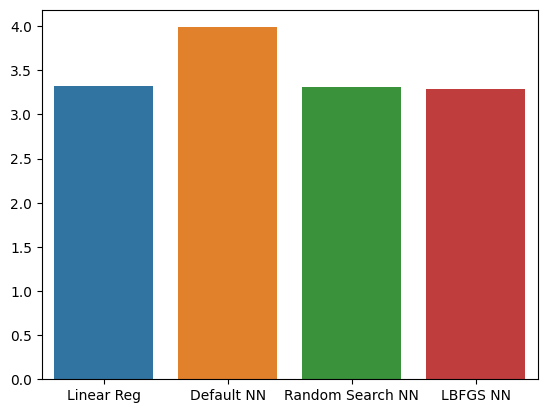

In [188]:
sns.barplot(val_error)

In [22]:
#Preparing to export to ONNX
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [30]:
#Fit the model on all the data we have 
model = MLPRegressor(
 solver= 'lbfgs',
 shuffle= True,
 activation= 'identity',
 learning_rate= 'adaptive',
 hidden_layer_sizes= (2, 5),
 alpha= 4.864e-05,
 tol= 1.122e-03,
 learning_rate_init= 9.999e-01,
)

In [31]:
model.fit(prices[["MN Close"]],prices.loc[:,"MN Target"])

MLPRegressor(activation='identity', alpha=4.864e-05, hidden_layer_sizes=(2, 5),
             learning_rate='adaptive', learning_rate_init=0.9999,
             solver='lbfgs', tol=0.001122)

In [32]:
#Define the input types for our ONNX model
initial_types = [("float_input",FloatTensorType([1,1]))]

In [33]:
# Create the ONNX representation
onnx_model = convert_sklearn(model,initial_types=initial_types,target_opset=12)

In [34]:
# Save the ONNX model
onnx.save_model(onnx_model,"EURUSD MN1 AI.onnx")

In [69]:
import netron

In [70]:
netron.start("EURUSD MN1 AI.onnx")

Serving 'EURUSD MN1 AI.onnx' at http://localhost:8080


('localhost', 8080)